**This code calculate the std of the individual runs, to see if the 10 runs is enough or not**
   |        |        |
   |        |        |
   |        |        |
average
 std
   <-------->
    average
      std
   <----------------->
        average
          std

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

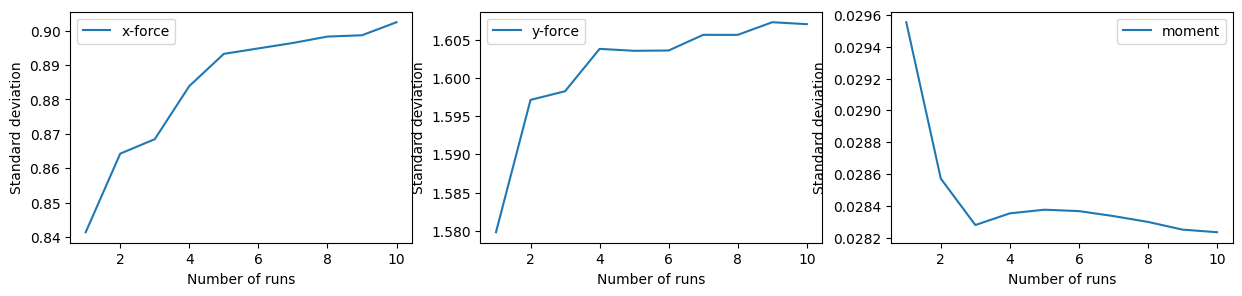

In [139]:
num_files  = 10     # number of force-coefs files
Alpha0 = 8
k = 'D'
# Folder = './inputs/experiments/Steady/AoA' + str(Alpha0) + '/'
Folder = './inputs/experiments/Case' + k + '/' # where files are stored
nt         = 9000 # length of data

# Import data:
data_raw  = {}
idata_raw  = {}
for i in range(num_files):
    # import initial data
    fileName = 'Initial_Force_Data_Run_' + f'{i+1:02d}' + '.csv'
    idata_raw[i+1] = pd.read_csv(Folder+fileName, skiprows=1, sep=',', usecols=[2,4,7], nrows=nt).to_numpy() # transform data to numpy array
    idata = np.mean(idata_raw[i+1],axis=0)
    
    # Import the force data:
    fileName = 'Force_Data_Run_' + f'{i+1:02d}' + '.csv'
    data = pd.read_csv(Folder+fileName, skiprows=1, sep=',', usecols=[2,4,7], names= ["fx","fy","mz"]) 
    
    data_raw[i+1] = data.iloc[5000:30000,:].copy().to_numpy() -  idata # transform data to numpy array
    
# Convert dictionary of numpy arrays to 3D numpy array:
data_arr = np.vstack(list(data_raw.values()))
idata_arr = np.vstack(list(idata_raw.values()))

# Calculate standard deviation for increasing numbers of runs:
num_runs = np.arange(1, num_files+1)
std_arr = np.zeros((num_files, 3))
for i in range(num_files):
    std_arr[i,:] = np.std(data_arr[:(i+1)*(30000-5000),:], axis=0)

# Plot standard deviation for each column:
fig,ax = plt.subplots(1,3,figsize=(15,3))
ax[0].plot(num_runs, std_arr[:,0], label='x-force')
ax[1].plot(num_runs, std_arr[:,1], label='y-force')
ax[2].plot(num_runs, std_arr[:,2], label='moment')
ax[0].set_xlabel('Number of runs')
ax[0].set_ylabel('Standard deviation')
ax[0].legend()

ax[1].set_xlabel('Number of runs')
ax[1].set_ylabel('Standard deviation')
ax[1].legend()

ax[2].set_xlabel('Number of runs')
ax[2].set_ylabel('Standard deviation')
ax[2].legend()



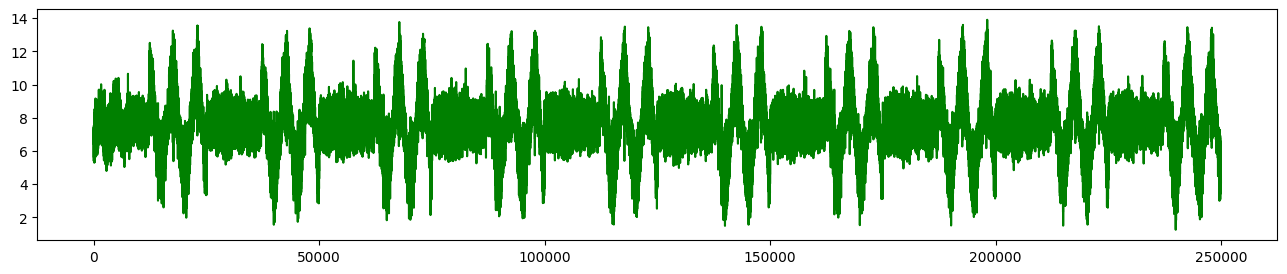

In [140]:
fig,ax = plt.subplots(figsize=(16,3))
# ax.plot(data_arr[:,0],'r')
ax.plot(data_arr[:,1],'g')
# ax.plot(data_arr[:,2],'k')

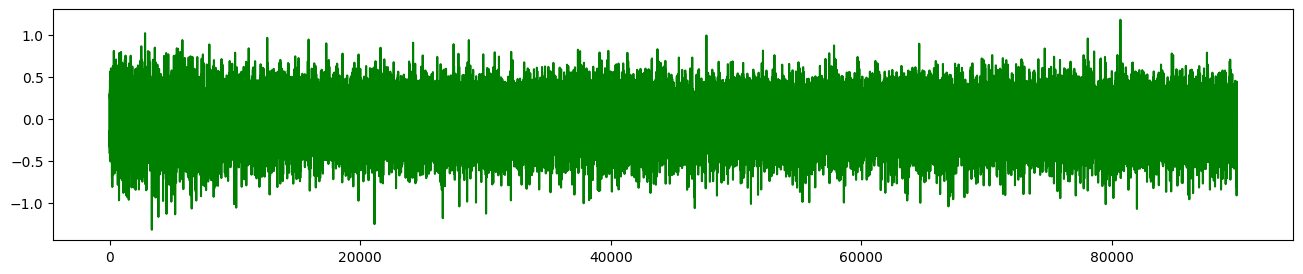

In [141]:
fig,ax = plt.subplots(figsize=(16,3))
# ax.plot(idata_arr[:,0],'r')
ax.plot(idata_arr[:,1],'g')
# ax.plot(idata_arr[:,2],'k')

In [ ]:
plt.plot(data_raw[6][:,1])